In [2]:
from alphaengine import loaders, stats, transforms
import numpy as np
import talib as ta
from itertools import product
from statsmodels.stats.weightstats import ttest_ind
import matplotlib.pyplot as plt
import csv
from datetime import datetime

In [3]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

In [4]:
aapl = loaders.FileInstrument('../data/aapl.csv')

In [5]:
z_close = transforms.z_score(aapl['close'], window_size=50)

In [6]:
strats = transforms.generate_strategies(z_close)

In [7]:
t10 = transforms.tn_returns(aapl, n=1)

In [8]:
v = stats.vectorized_volatility_efficiency(aapl['forward_returns'], strats)

/Users/stu/PycharmProjects/AlphaEngine/alphaengine/stats.py:117: RuntimeWarning: invalid value encountered in true_divide
  vol_effs = strat_v_bh / (np.sum(_strategy.astype(int), axis=1) / _strategy.shape[1])


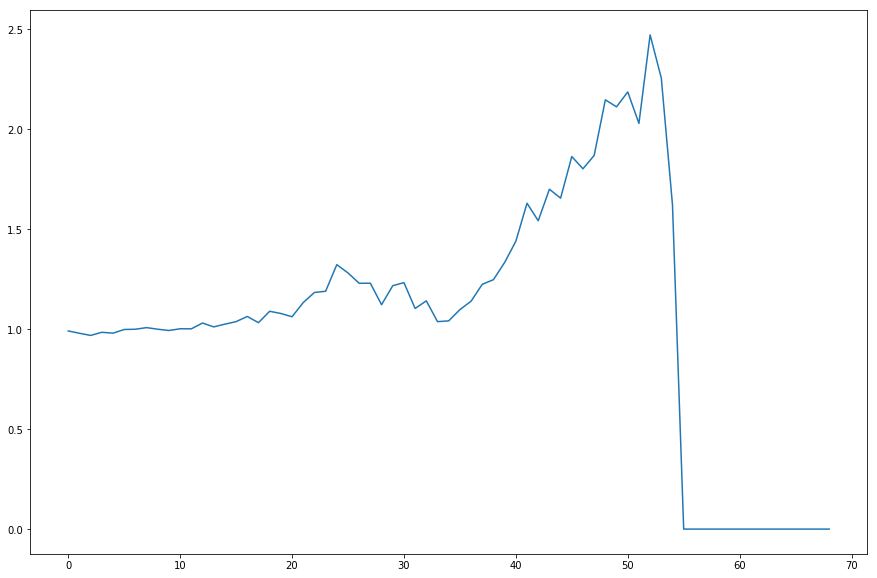

In [9]:
plt.plot(v)

In [10]:
best_strat = strats[np.argmax(v)]

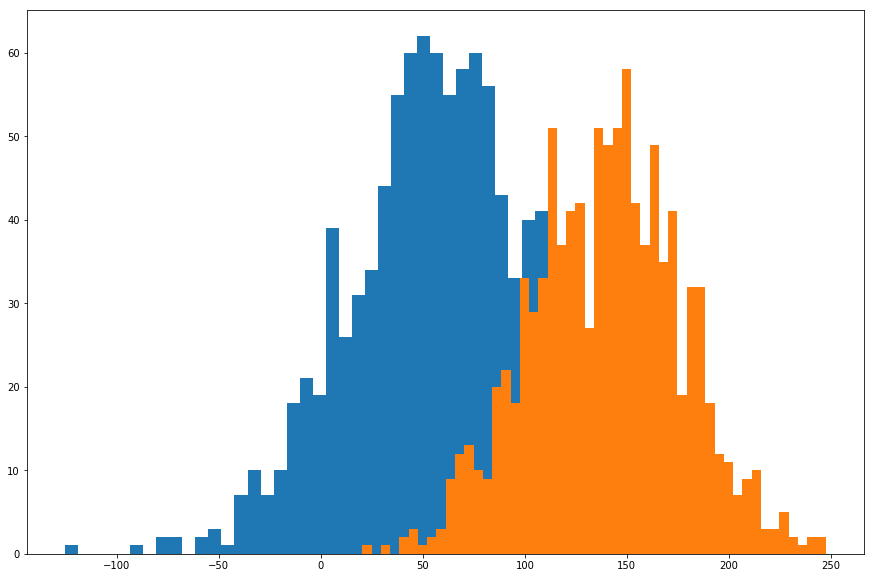

In [11]:
stats.plot_strat_monte_carlo(aapl, best_strat)

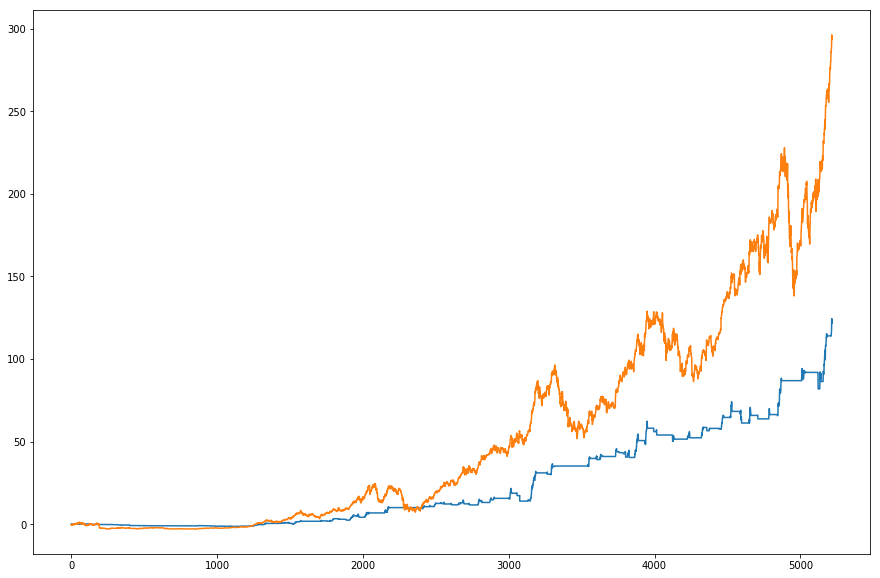

In [12]:
performance = best_strat.astype(int) * aapl['forward_returns']
plt.plot(np.cumsum(performance))
plt.plot(np.cumsum(aapl['forward_returns']))

In [13]:
a, b, c = ta.MACD(aapl['close'])

In [14]:
transforms.z_score(c, window_size=50)
strats = transforms.generate_strategies(z_close)
v = stats.vectorized_volatility_efficiency(aapl['forward_returns'], strats)

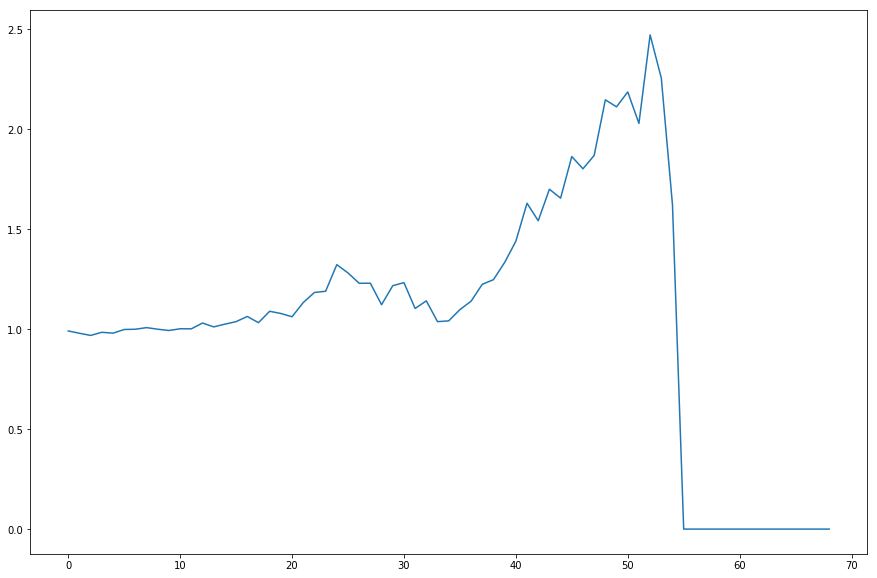

In [15]:
plt.plot(v)

In [16]:
def explore_feature(feature, returns, window_size=100):
    z = transforms.z_score(feature, window_size=window_size)
    strats = transforms.generate_strategies(z)
    v = stats.vectorized_volatility_efficiency(returns, strats)
    return v, strats

In [17]:
vv, ss = explore_feature(b, aapl['forward_returns'])

In [18]:
v, s = explore_feature(c, aapl['forward_returns'])

In [19]:
v3, s3 = explore_feature(aapl['close'], aapl['forward_returns'])

In [20]:
v4, s4 = explore_feature(ta.RSI(aapl['close']), aapl['forward_returns'])

In [21]:
s[np.argmax(v)]

array([False, False, False, ...,  True,  True,  True])

In [22]:
mixed = ss[np.argmax(vv)] + s4[np.argmax(v4)]# + s3[np.argmax(v3)]

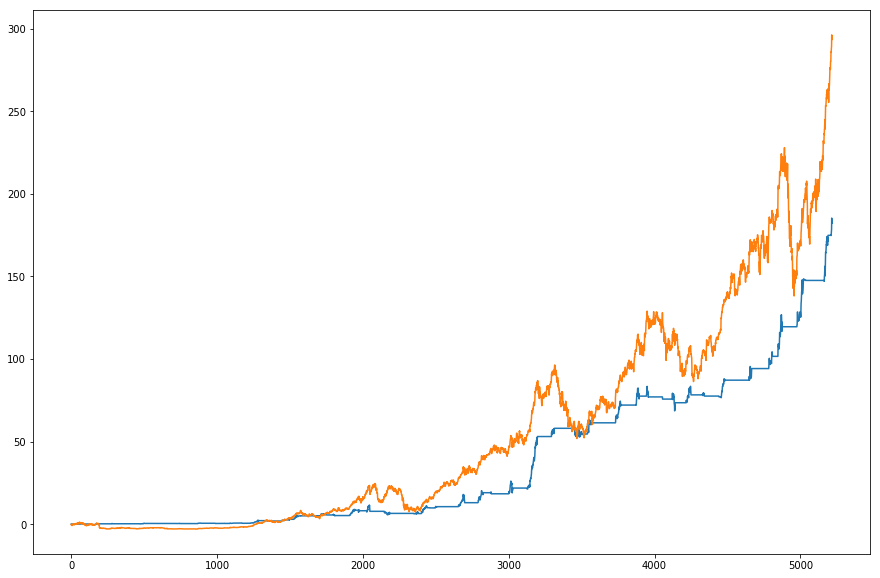

In [23]:
performance = mixed.astype(int) * aapl['forward_returns']
plt.plot(np.cumsum(performance))
plt.plot(np.cumsum(aapl['forward_returns']))

In [24]:
msft = loaders.FileInstrument('../../../Developer/Data/prices/AMEX/GLD.csv')

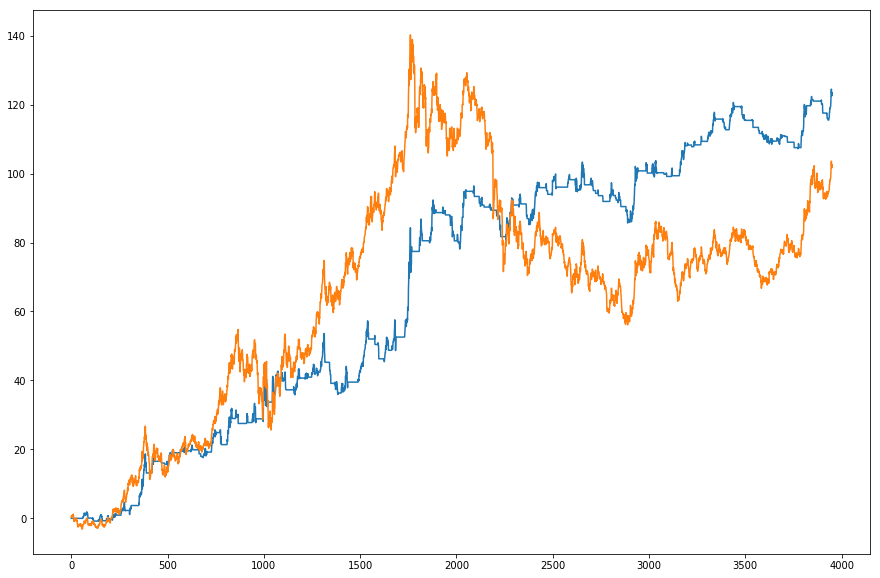

In [25]:
a, b, c = ta.MACD(msft['close'])
v1, s1 = explore_feature(b, msft['forward_returns'], window_size=50)
v4, s4 = explore_feature(ta.RSI(msft['close']), msft['forward_returns'], window_size=30)
mixed = s4[np.argmax(v4)] + s1[np.argmax(v1)]
performance = mixed.astype(int) * msft['forward_returns']
plt.plot(np.cumsum(performance))
plt.plot(np.cumsum(msft['forward_returns']))


In [26]:
rsis = [ta.RSI(msft['close'], timeperiod=10 + (i * 10)) for i in range(10)]

In [27]:
results = [explore_feature(rsi, msft['forward_returns'], window_size=30) for rsi in rsis]

In [28]:
z = [result[1][np.argmax(result[0])] for result in results]

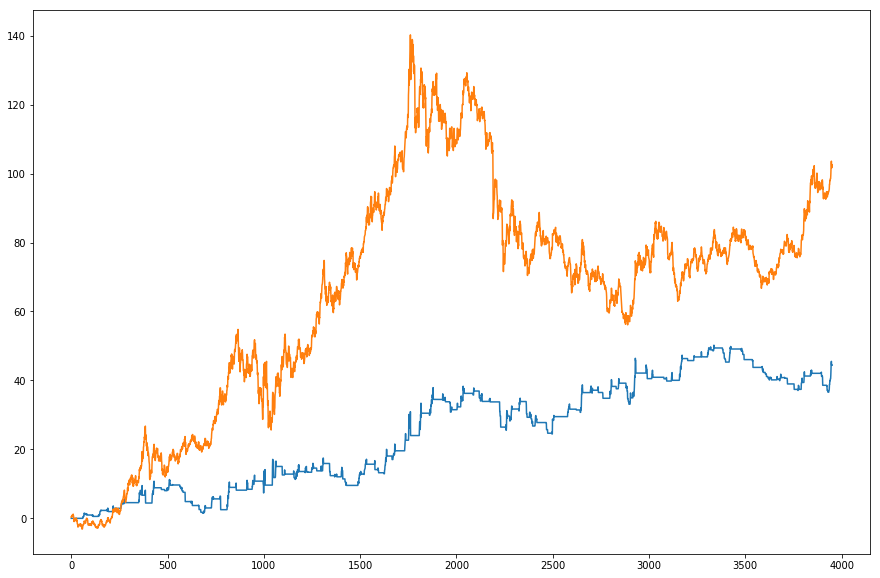

In [29]:
performance = z[0].astype(int) * msft['forward_returns']
plt.plot(np.cumsum(performance))
plt.plot(np.cumsum(msft['forward_returns']))

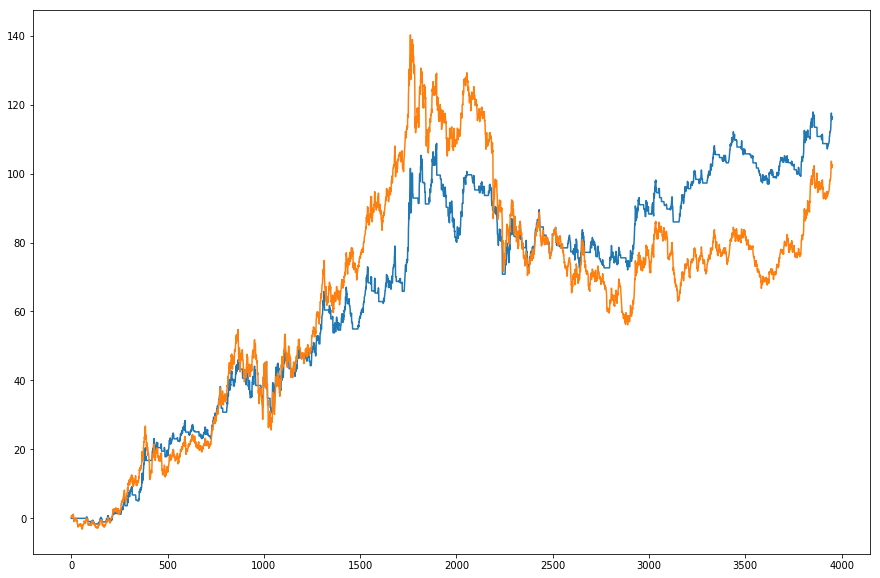

In [30]:
emas = [msft['close'] - ta.EMA(msft['close'], timeperiod=10 + (i * 10)) for i in range(10)]
results = [explore_feature(ema, msft['forward_returns'], window_size=30) for ema in emas]
s = [result[1][np.argmax(result[0])] for result in results]

performance = s[4].astype(int) * msft['forward_returns']
plt.plot(np.cumsum(performance))
plt.plot(np.cumsum(msft['forward_returns']))

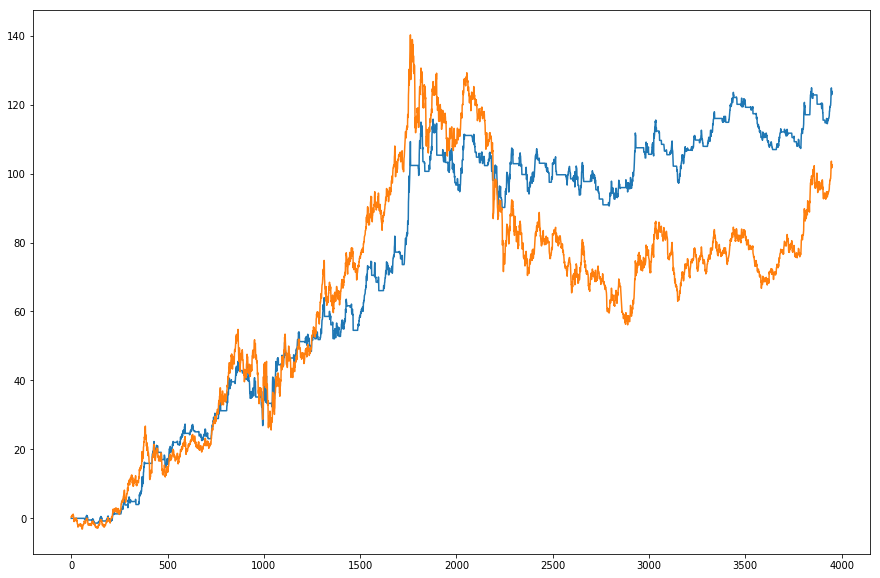

In [31]:
emas = [ta.CCI(msft['high'], msft['low'], msft['close'], timeperiod=10 + (i * 10)) for i in range(10)]
results = [explore_feature(ema, msft['forward_returns'], window_size=30) for ema in emas]
ss = [result[1][np.argmax(result[0])] for result in results]

performance = ss[3].astype(int) * msft['forward_returns']
plt.plot(np.cumsum(performance))
plt.plot(np.cumsum(msft['forward_returns']))

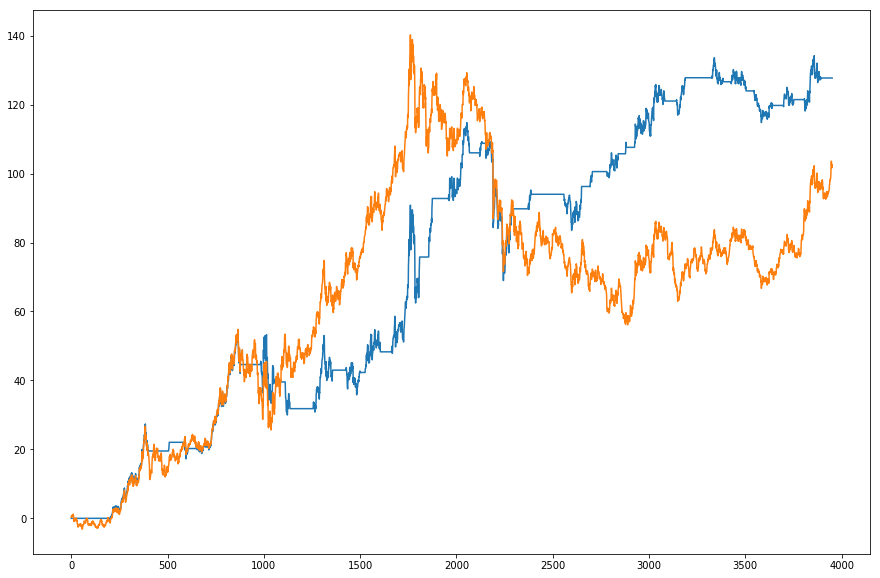

In [32]:
emas = [ta.ADX(msft['high'], msft['low'], msft['close'], timeperiod=10 + (i * 10)) for i in range(10)]
results = [explore_feature(ema, msft['forward_returns'], window_size=100) for ema in emas]
ss = [result[1][np.argmax(result[0])] for result in results]

performance = ss[4].astype(int) * msft['forward_returns']
plt.plot(np.cumsum(performance))
plt.plot(np.cumsum(msft['forward_returns']))

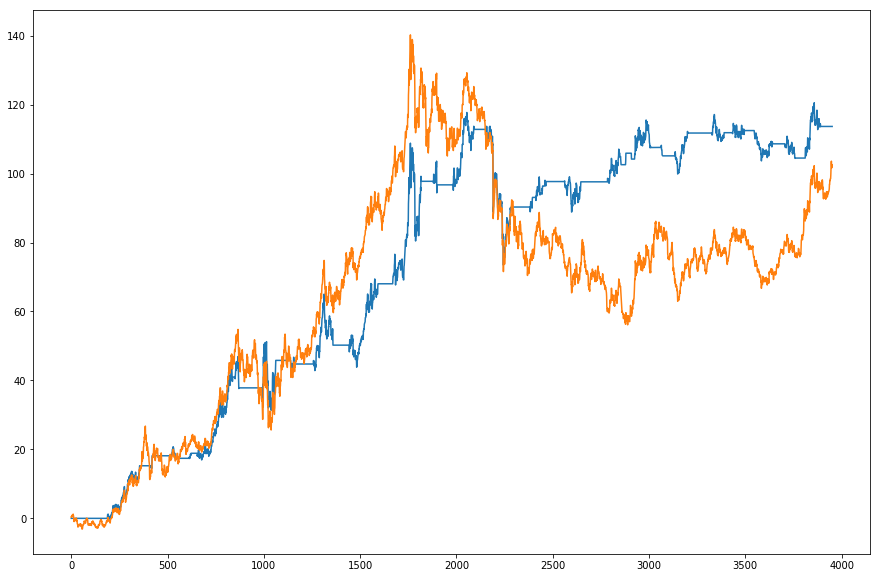

In [33]:
emas = [ta.ADXR(msft['high'], msft['low'], msft['close'], timeperiod=10 + (i * 10)) for i in range(10)]
results = [explore_feature(ema, msft['forward_returns'], window_size=100) for ema in emas]
ss = [result[1][np.argmax(result[0])] for result in results]

performance = ss[2].astype(int) * msft['forward_returns']
plt.plot(np.cumsum(performance))
plt.plot(np.cumsum(msft['forward_returns']))

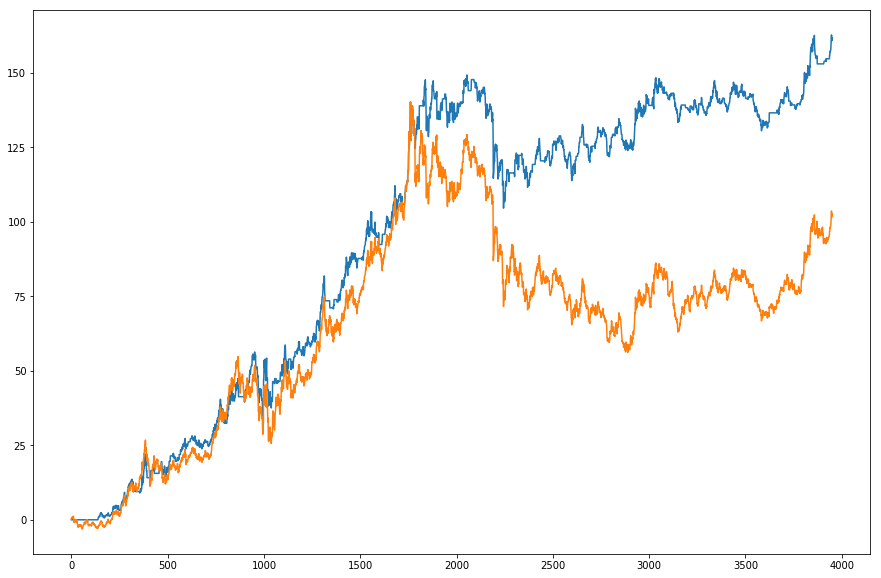

In [34]:
emas = [ta.DX(msft['high'], msft['low'], msft['close'], timeperiod=10 + (i * 10)) for i in range(10)]
results = [explore_feature(ema, msft['forward_returns'], window_size=100) for ema in emas]
ss = [result[1][np.argmax(result[0])] for result in results]
performance = ss[3].astype(int) * msft['forward_returns']
plt.plot(np.cumsum(performance))
plt.plot(np.cumsum(msft['forward_returns']))

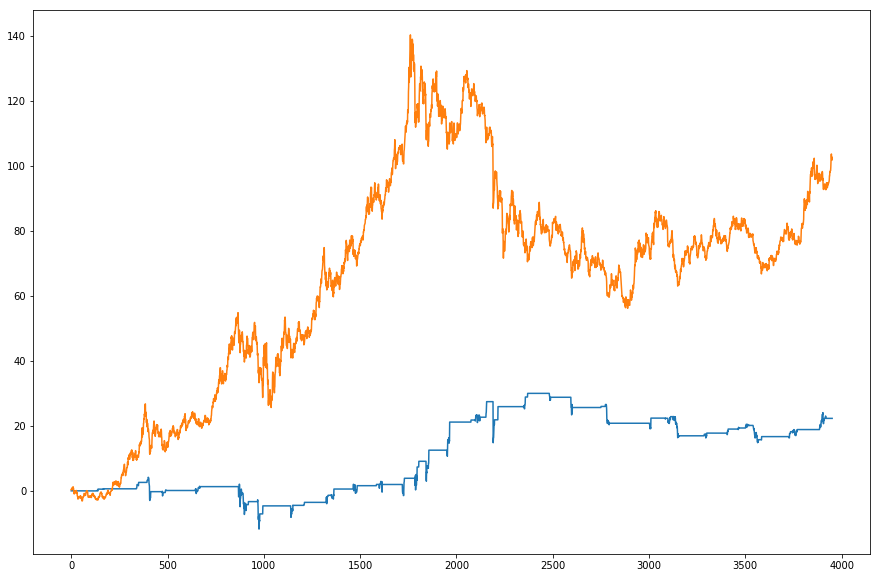

In [35]:
emas = [ta.MINUS_DI(msft['high'], msft['low'], msft['close'], timeperiod=10 + (i * 10)) for i in range(10)]
results = [explore_feature(ema, msft['forward_returns'], window_size=100) for ema in emas]
ss = [result[1][np.argmax(result[0])] for result in results]
performance = ss[2].astype(int) * msft['forward_returns']
plt.plot(np.cumsum(performance))
plt.plot(np.cumsum(msft['forward_returns']))

In [36]:
emas = [msft['close'] - ta.EMA(msft['close'], timeperiod=10 + (i * 10)) for i in range(10)]
results = [explore_feature(ema, msft['forward_returns'], window_size=100) for ema in emas]

In [37]:
c, v =  zip(*results)

In [38]:
performance = __v[np.argmax(c)].astype(int) * msft['forward_returns']
plt.plot(np.cumsum(performance))
plt.plot(np.cumsum(msft['forward_returns']))

NameError: name '__v' is not defined

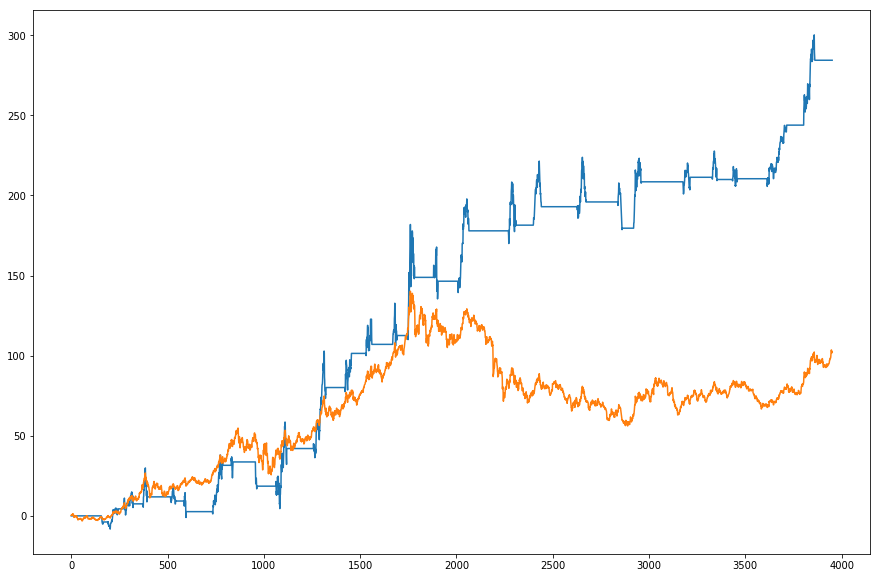

In [39]:
emas = [ta.TRIX(msft['close'], timeperiod=10 + (i * 10)) for i in range(10)]
results = [explore_feature(ema, msft['forward_returns'], window_size=100) for ema in emas]
ss = [result[1][np.argmax(result[0])] for result in results]
performance = ss[1].astype(int) * msft['forward_returns'] * 3
plt.plot(np.cumsum(performance))
plt.plot(np.cumsum(msft['forward_returns']))

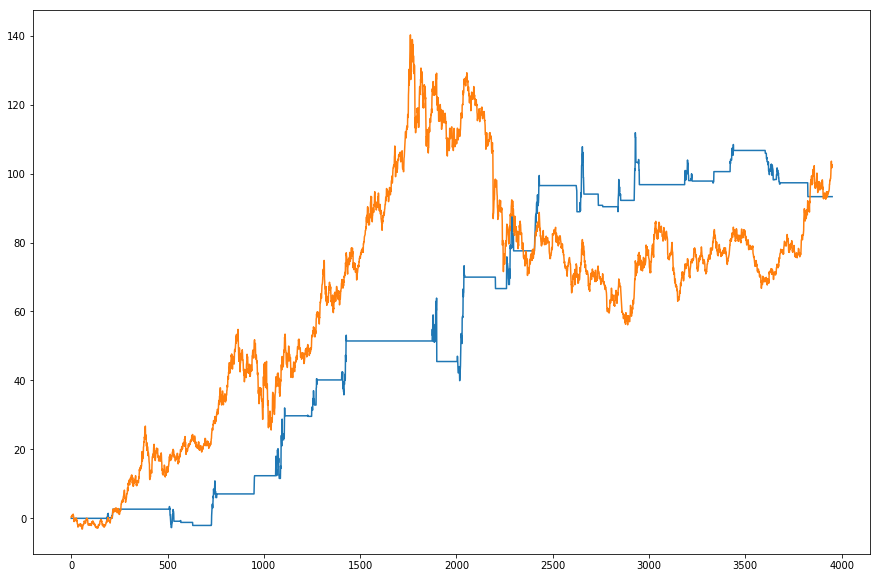

In [40]:
emas = [ta.WILLR(msft['high'], msft['low'], msft['close'], timeperiod=10 + (i * 10)) for i in range(10)]
results = [explore_feature(ema, msft['forward_returns'], window_size=100) for ema in emas]
ss = [result[1][np.argmax(result[0])] for result in results]
performance = ss[6].astype(int) * msft['forward_returns'] * 2
plt.plot(np.cumsum(performance))
plt.plot(np.cumsum(msft['forward_returns']))

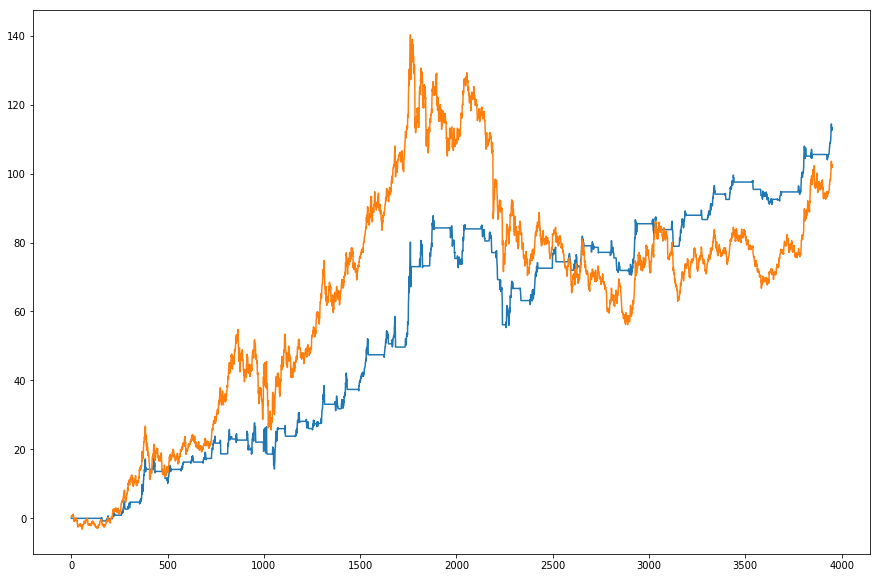

In [41]:
emas = [np.diff(ta.TRIX(msft['close'], timeperiod=10 + (i * 10)), prepend=0) for i in range(10)]
results = [explore_feature(ema, msft['forward_returns'], window_size=100) for ema in emas]
ss = [result[1][np.argmax(result[0])] for result in results]
performance = ss[1].astype(int) * msft['forward_returns']
plt.plot(np.cumsum(performance))
plt.plot(np.cumsum(msft['forward_returns']))

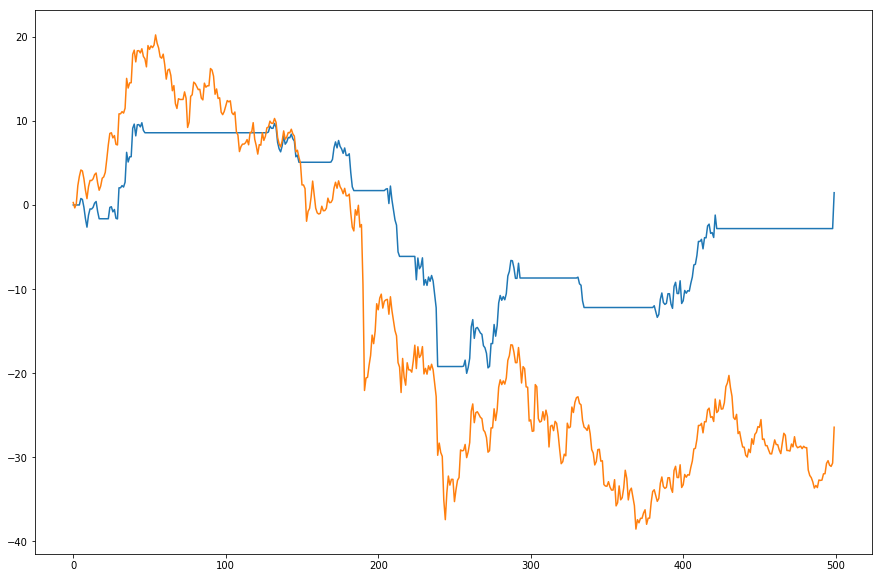

In [42]:
performance = ss[1].astype(int) * msft['forward_returns']
plt.plot(np.cumsum(performance[2000:2500]))
plt.plot(np.cumsum(msft['forward_returns'][2000:2500]))

In [43]:
perfect_strategy = msft['forward_returns'] > 0

In [44]:
def rolling_window(a, window_size):
    shape = (a.shape[0] - window_size + 1, window_size) + a.shape[1:]
    strides = (a.strides[0],) + a.strides
    x = np.ones((window_size - 1, window_size)) * np.nan
    return np.vstack((x, np.lib.stride_tricks.as_strided(a, shape=shape, strides=strides)))

def tn_returns(data, n=5):
    x = rolling_window(data, window_size=n+1)
    return x[:, -1]-x[:, 0]

/Users/stu/PycharmProjects/AlphaEngine/alphaengine/stats.py:117: RuntimeWarning: invalid value encountered in true_divide
  vol_effs = strat_v_bh / (np.sum(_strategy.astype(int), axis=1) / _strategy.shape[1])


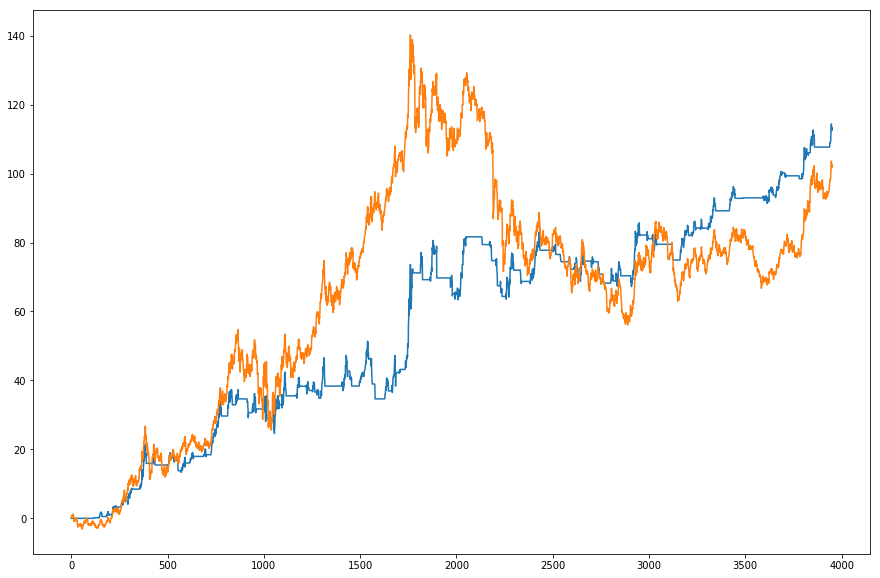

In [56]:
emas = [tn_returns(ta.EMA(msft['close'], timeperiod=10 + (i * 10)), n=10) for i in range(10)]


results = [explore_feature(ema, msft['forward_returns'], window_size=100) for ema in emas]
ss = [result[1][np.argmax(result[0])] for result in results]
performance = ss[0].astype(int) * msft['forward_returns']
plt.plot(np.cumsum(performance))
plt.plot(np.cumsum(msft['forward_returns']))

In [57]:
np.cumsum(performance)

array([  0.  ,   0.  ,   0.  , ..., 112.44, 113.32, 113.32])

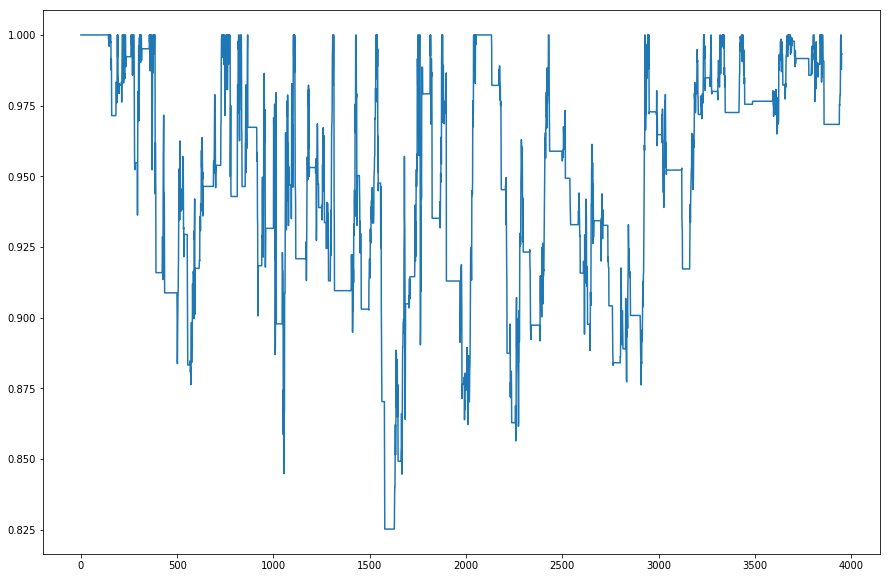

In [58]:
plt.plot(stats.drawdown(np.cumsum(performance)+ msft['close'][0]))

In [59]:
signal = np.diff(ss[0].astype(int), prepend=0)

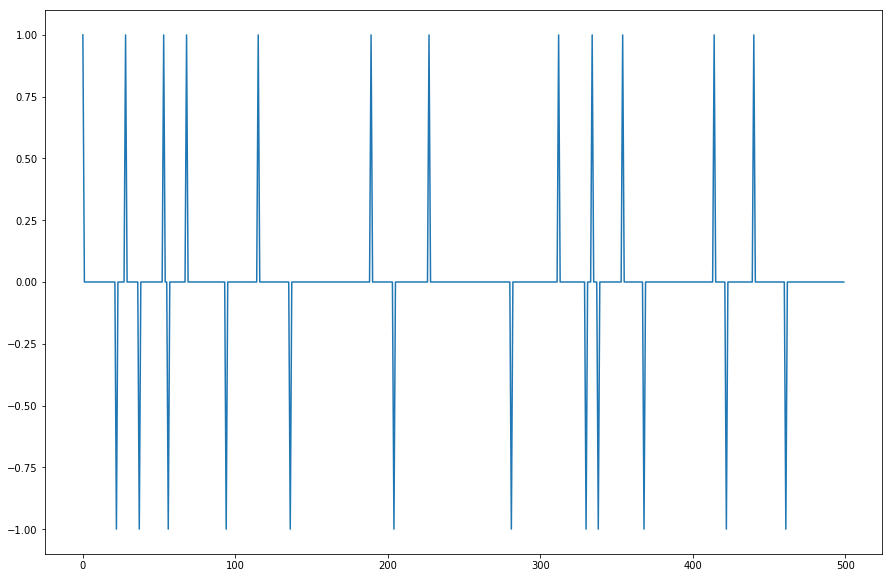

In [60]:
plt.plot(signal[500:1000])

In [61]:
from sklearn import linear_model
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor, AdaBoostRegressor

In [62]:
emas = [tn_returns(ta.EMA(msft['close'], timeperiod=10 + (i * 10)), n=10) for i in range(50)] + \
       [np.diff(ta.TRIX(msft['close'], timeperiod=10 + (i * 10)), prepend=0) for i in range(50)] + \
       [ta.WILLR(msft['high'], msft['low'], msft['close'], timeperiod=10 + (i * 10)) for i in range(50)]

In [63]:
def make_regressor(asset, raw_features, model, window_size=100, split=0.66):
    features = []

    for e in raw_features:
        features.append(transforms.z_score(e, window_size=window_size))
        
    f = np.array(features).T
    t = transforms.z_score(asset['forward_returns'], window_size=window_size)
    
    idx = int(len(t) * split)
    
    train_f = np.nan_to_num(f[:idx])
    test_f = np.nan_to_num(f[idx:])

    train_t = np.nan_to_num(t[:idx])
    test_t = np.nan_to_num(t[idx:])
    
    model.fit(train_f, train_t)
    
    return model, test_f, test_t

In [64]:
reg = AdaBoostRegressor(n_estimators=500)

In [65]:
model, test_f, test_t = make_regressor(msft, emas, reg)

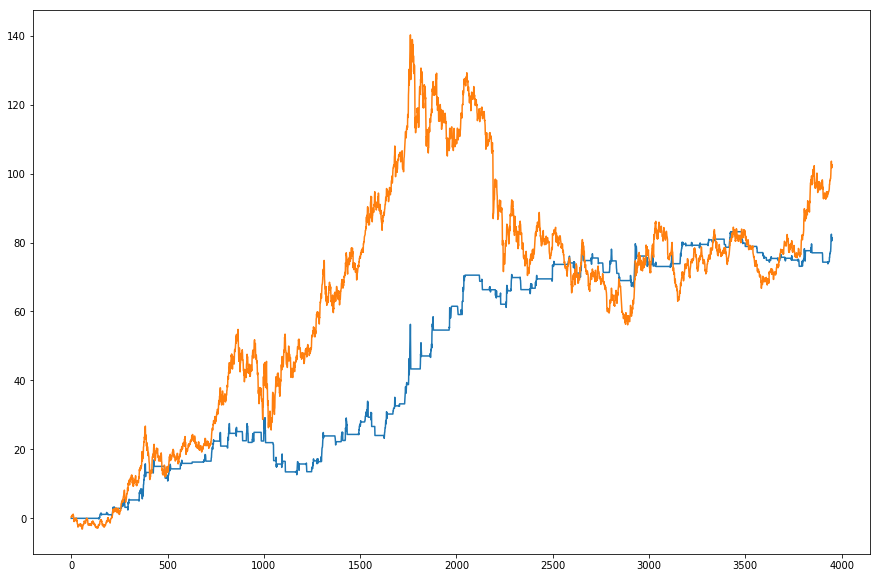

In [83]:
emas = [tn_returns(ta.TEMA(msft['close'], timeperiod=10 + (i * 10)), n=10) for i in range(30)]
results = [explore_feature(ema, msft['forward_returns'], window_size=50) for ema in emas]

ss = [result[1][np.argmax(result[0])] for result in results]
performance = ss[0].astype(int) * msft['forward_returns']
plt.plot(np.cumsum(performance))
plt.plot(np.cumsum(msft['forward_returns']))

In [455]:
pred = reg.predict(test_f)

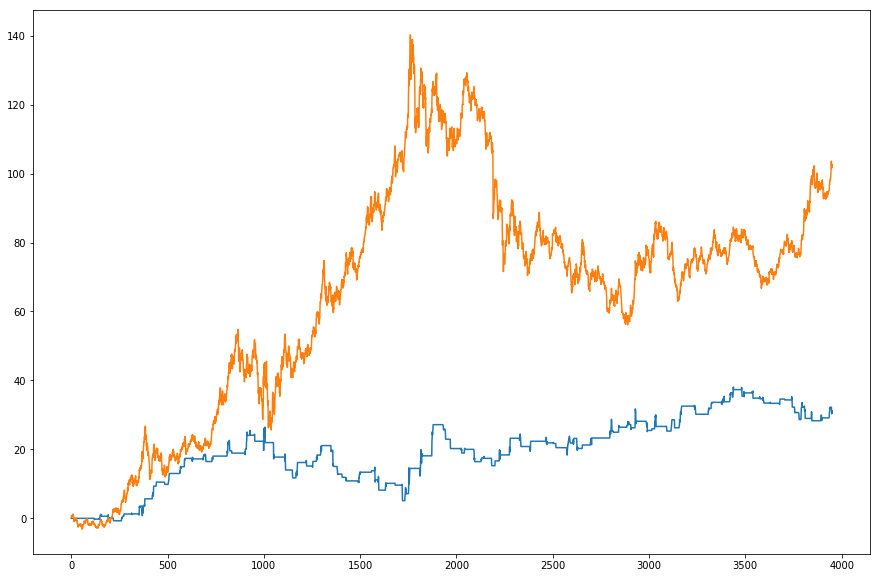

In [87]:
emas = [ta.SMA(np.diff(ta.SMA(tn_returns(msft['close'])), prepend=ta.SMA(tn_returns(msft['close']))[0]), timeperiod=(i+1)*5) for i in range(20)]
results = [explore_feature(ema, msft['forward_returns'], window_size=50) for ema in emas]

ss = [result[1][np.argmax(result[0])] for result in results]
performance = ss[0].astype(int) * msft['forward_returns']
plt.plot(np.cumsum(performance))
plt.plot(np.cumsum(msft['forward_returns']))